### A few initial libraries ###

In [3]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

from gate_variants.toffoli_variants import CCX_Variant_Gate 
from orientation_map import orientation_map_gen

from backends.backend_connectivity import cluster, twoDSL, couplingmap_to_graph, orientation_from_coupling

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

from trios_bench.cnx_dirty import generate_dirty_multicontrol
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty
from trios_bench.cnx_logdepth import generate_cnx_log_depth
from trios_bench.cnx_inplace import generate_cnx_inplace
from trios_bench.cuccaro_adder import generate_cuccaro_adder
from trios_bench.Takahashi_adder import generate_takahashi_adder
from trios_bench.incrementer_borrowedbit import generate_incrementer
from trios_bench.grovers_integer_search import generate_grover_integer_search_circuit
from trios_bench.qaoa import generate_random_QAOA
from trios_bench.sym6 import generate_sym6

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [7]:
coupling_map = twoDSL(20, 5)

In [8]:
coupling_map

[[0, 1],
 [1, 0],
 [0, 5],
 [5, 0],
 [1, 2],
 [2, 1],
 [1, 6],
 [6, 1],
 [2, 3],
 [3, 2],
 [2, 7],
 [7, 2],
 [3, 4],
 [4, 3],
 [3, 8],
 [8, 3],
 [4, 9],
 [9, 4],
 [5, 6],
 [6, 5],
 [5, 10],
 [10, 5],
 [6, 7],
 [7, 6],
 [6, 11],
 [11, 6],
 [7, 8],
 [8, 7],
 [7, 12],
 [12, 7],
 [8, 9],
 [9, 8],
 [8, 13],
 [13, 8],
 [9, 14],
 [14, 9],
 [10, 11],
 [11, 10],
 [10, 15],
 [15, 10],
 [11, 12],
 [12, 11],
 [11, 16],
 [16, 11],
 [12, 13],
 [13, 12],
 [12, 17],
 [17, 12],
 [13, 14],
 [14, 13],
 [13, 18],
 [18, 13],
 [14, 19],
 [19, 14],
 [15, 16],
 [16, 15],
 [16, 17],
 [17, 16],
 [17, 18],
 [18, 17],
 [18, 19],
 [19, 18]]

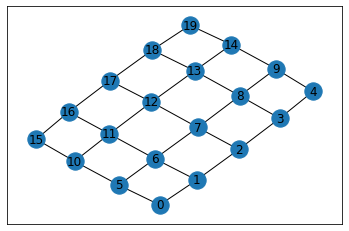

In [9]:
couplingmap_to_graph(coupling_map, Draw=True)

In [10]:
orientation_map = orientation_from_coupling(coupling_map)

In [11]:
orientation_map

{(0, 1): 'b',
 (1, 0): 'f',
 (0, 5): 'b',
 (5, 0): 'f',
 (1, 2): 'b',
 (2, 1): 'f',
 (1, 6): 'b',
 (6, 1): 'f',
 (2, 3): 'b',
 (3, 2): 'f',
 (2, 7): 'b',
 (7, 2): 'f',
 (3, 4): 'b',
 (4, 3): 'f',
 (3, 8): 'b',
 (8, 3): 'f',
 (4, 9): 'b',
 (9, 4): 'f',
 (5, 6): 'b',
 (6, 5): 'f',
 (5, 10): 'b',
 (10, 5): 'f',
 (6, 7): 'b',
 (7, 6): 'f',
 (6, 11): 'b',
 (11, 6): 'f',
 (7, 8): 'b',
 (8, 7): 'f',
 (7, 12): 'b',
 (12, 7): 'f',
 (8, 9): 'b',
 (9, 8): 'f',
 (8, 13): 'b',
 (13, 8): 'f',
 (9, 14): 'b',
 (14, 9): 'f',
 (10, 11): 'b',
 (11, 10): 'f',
 (10, 15): 'b',
 (15, 10): 'f',
 (11, 12): 'b',
 (12, 11): 'f',
 (11, 16): 'b',
 (16, 11): 'f',
 (12, 13): 'b',
 (13, 12): 'f',
 (12, 17): 'b',
 (17, 12): 'f',
 (13, 14): 'b',
 (14, 13): 'f',
 (13, 18): 'b',
 (18, 13): 'f',
 (14, 19): 'b',
 (19, 14): 'f',
 (15, 16): 'b',
 (16, 15): 'f',
 (16, 17): 'b',
 (17, 16): 'f',
 (17, 18): 'b',
 (18, 17): 'f',
 (18, 19): 'b',
 (19, 18): 'f'}

### Load device and the device configuration object ###

In [12]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [13]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [14]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [15]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_pass_manager, level_3_orign_pulse_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [16]:
qc0 = generate_dirty_multicontrol(6, 11)
qc1 = generate_cnx_halfdirty(19)
qc2 = generate_cnx_log_depth(19)
qc3 = generate_cnx_inplace(4)
qc4 = generate_cuccaro_adder(20)
qc5 = generate_takahashi_adder(20)
qc6 = generate_incrementer(5)
qc7 = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc8 = generate_random_QAOA(10, 0.6, 2)
qc9 = generate_sym6()
qc_list = [qc0, qc1, qc2, qc3, qc4, qc5,qc6, qc7 , qc8, qc9]

In [17]:
backend = provider.get_backend('ibmq_montreal')

In [18]:
backend_monitor(backend)

ibmq_montreal
Configuration
-------------
    n_qubits: 27
    operational: True
    status_msg: active
    pending_jobs: 199
    backend_version: 1.11.13
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    allow_q_object: True
    processor_type: {'family': 'Falcon', 'revision': 4}
    live_data: False
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    clops: 1968
    quantum_volume:

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.91108 GHz / 166.48393 us / 135.20237 us / 0.00000 / 0.00023 / 0.00023 / 0.01330 
    Q1 / 4.83494 GHz / 134.64490 us / 41.31502 us / 0.00000 / 0.00015 / 0.00015 / 0.01380 
    Q2 / 4.98254 GHz / 93.34680 us / 70.81865 us / 0.00000 / 0.00042 / 0.00042 / 0.01850 
    Q3 / 5.10539 GHz / 117.34045 us / 32.36840 us / 0.00000 / 0.00032 / 0.00032 / 0.01330 
    Q4 / 5.00395 GHz / 117.03098 us / 205.57099 us / 0.00000 / 0.00029 / 0.00029 / 0.01700 
    Q5 / 5.03285 GHz / 87.83655 us / 66.17356 us / 0.00000 / 0.00041 / 0.00041 / 0.02180 
    Q6 / 4.95092 GHz / 151.33222 us / 31.51202 us / 0.00000 / 0.00039 / 0.00039 / 0.10900 
    Q7 / 4.90234 GHz / 141.28139 us / 125.79953 us / 0.00000 / 0.00030 / 0.00030 / 0.08530 
    Q8 / 4.90803 GHz / 91.67364 us / 95.65526 us / 0.00000 / 0.00026 / 0.00026 / 0.02500 
    Q9 / 5.04472 GHz / 81.47856 us / 93

In [19]:
backend_prop = backend.properties()

In [20]:
#orientation_map = orientation_map_gen(backend)

In [21]:
#coupling_map = [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]

In [22]:
transpile_args = _parse_transpile_args(qc_list, backend = None, coupling_map = coupling_map, basis_gates = ['cx', 'rz', 'sx', 'x', 'acecr_pm'], seed_transpiler = 0, orientation_map = orientation_map)

In [23]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [24]:
print(pass_manager_config.orientation_map)

{(0, 1): 'b', (1, 0): 'f', (0, 5): 'b', (5, 0): 'f', (1, 2): 'b', (2, 1): 'f', (1, 6): 'b', (6, 1): 'f', (2, 3): 'b', (3, 2): 'f', (2, 7): 'b', (7, 2): 'f', (3, 4): 'b', (4, 3): 'f', (3, 8): 'b', (8, 3): 'f', (4, 9): 'b', (9, 4): 'f', (5, 6): 'b', (6, 5): 'f', (5, 10): 'b', (10, 5): 'f', (6, 7): 'b', (7, 6): 'f', (6, 11): 'b', (11, 6): 'f', (7, 8): 'b', (8, 7): 'f', (7, 12): 'b', (12, 7): 'f', (8, 9): 'b', (9, 8): 'f', (8, 13): 'b', (13, 8): 'f', (9, 14): 'b', (14, 9): 'f', (10, 11): 'b', (11, 10): 'f', (10, 15): 'b', (15, 10): 'f', (11, 12): 'b', (12, 11): 'f', (11, 16): 'b', (16, 11): 'f', (12, 13): 'b', (13, 12): 'f', (12, 17): 'b', (17, 12): 'f', (13, 14): 'b', (14, 13): 'f', (13, 18): 'b', (18, 13): 'f', (14, 19): 'b', (19, 14): 'f', (15, 16): 'b', (16, 15): 'f', (16, 17): 'b', (17, 16): 'f', (17, 18): 'b', (18, 17): 'f', (18, 19): 'b', (19, 18): 'f'}


In [25]:
def generate_results(qc, pass_config):
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)
    return [qc_orign, qc_orign_pulse, qc_context, qc_context_pulse]

In [26]:
result_lists = []
for qc in qc_list:
    result_lists.append(generate_results(qc, pass_manager_config))

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
14: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
13: Qubit(QuantumRegister(18, 'q'), 2),
9: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 4),
12: Qubit(QuantumRegister(18, 'q'), 5),
8: Qubit(QuantumRegister(18, 'q'), 6),
4: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
11: Qubit(QuantumRegister(18, 'q'), 9),
7: Qubit(QuantumRegister(18, 'q'), 10),
3: Qubit(QuantumRegister(18, 'q'), 11),
10: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
2: Qubit(QuantumRegister(18, 'q'), 14),
5: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18,

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
14: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
13: Qubit(QuantumRegister(18, 'q'), 2),
9: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 4),
12: Qubit(QuantumRegister(18, 'q'), 5),
8: Qubit(QuantumRegister(18, 'q'), 6),
4: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
11: Qubit(QuantumRegister(18, 'q'), 9),
7: Qubit(QuantumRegister(18, 'q'), 10),
3: Qubit(QuantumRegister(18, 'q'), 11),
10: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
2: Qubit(QuantumRegister(18, 'q'), 14),
5: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  7 12 8
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
successor swap two intersectio

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
14: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
13: Qubit(QuantumRegister(18, 'q'), 2),
9: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 4),
12: Qubit(QuantumRegister(18, 'q'), 5),
8: Qubit(QuantumRegister(18, 'q'), 6),
4: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
11: Qubit(QuantumRegister(18, 'q'), 9),
7: Qubit(QuantumRegister(18, 'q'), 10),
3: Qubit(QuantumRegister(18, 'q'), 11),
10: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
2: Qubit(QuantumRegister(18, 'q'), 14),
5: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  7 12 8
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
successor swap two intersectio

intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 11)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 9), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'),

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
18: Qubit(QuantumRegister(19, 'q'), 0),
14: Qubit(QuantumRegister(19, 'q'), 1),
17: Qubit(QuantumRegister(19, 'q'), 2),
13: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
16: Qubit(QuantumRegister(19, 'q'), 5),
12: Qubit(QuantumRegister(19, 'q'), 6),
8: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
15: Qubit(QuantumRegister(19, 'q'), 9),
11: Qubit(QuantumRegister(19, 'q'), 10),
7: Qubit(QuantumRegister(19, 'q'), 11),
3: Qubit(QuantumRegister(19, 'q'), 12),
10: Qubit(QuantumRegister(19, 'q'), 13),
6: Qubit(QuantumRegister(19, 'q'), 14),
2: Qubit(QuantumRegister(19, 'q'), 15),
5: 

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('01', '00', 'l0', 'p')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match 

look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister

('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 14), Qubit(QuantumRegister(20, 'q'), 13)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 13)]
('00', '11', 'b')
('11', '00', 

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
18: Qubit(QuantumRegister(19, 'q'), 0),
14: Qubit(QuantumRegister(19, 'q'), 1),
17: Qubit(QuantumRegister(19, 'q'), 2),
13: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
16: Qubit(QuantumRegister(19, 'q'), 5),
12: Qubit(QuantumRegister(19, 'q'), 6),
8: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
15: Qubit(QuantumRegister(19, 'q'), 9),
11: Qubit(QuantumRegister(19, 'q'), 10),
7: Qubit(QuantumRegister(19, 'q'), 11),
3: Qubit(QuantumRegister(19, 'q'), 12),
10: Qubit(QuantumRegister(19, 'q'), 13),
6: Qubit(QuantumRegister(19, 'q'), 14),
2: Qubit(QuantumRegister(19, 'q'), 15),
5: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  12 13 11
The required toffoli will be decomposed using an 8 cnot decomposition 

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
2: Qubit(QuantumRegister(4, 'q'), 0),
1: Qubit(QuantumRegister(4, 'q'), 1),
0: Qubit(QuantumRegister(4, 'q'), 2),
5: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  2 1 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  2 1 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  1 6 7
The required toffoli will be decomposed using an 8 cnot decomposition - one in cente

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
2: Qubit(QuantumRegister(4, 'q'), 0),
1: Qubit(QuantumRegister(4, 'q'), 1),
0: Qubit(QuantumRegister(4, 'q'), 2),
5: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  2 1 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 2) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags ['00', '01', 'l1', 's'] ['01', '00', 'l1', 'p']
initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  2 1 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
sub_tag before optimize ['01', '00',

three qargs Qubit(QuantumRegister(20, 'q'), 6) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 7)
calculated tags for substituted ['21', '00', 'l0', 'p'] ['00', '00', 'l0', 'p']
the optimized substituted tag ['21', '00', 'l0', 'p']
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  7 1 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True True True
three qargs Qubit(QuantumRegister(20, 'q'), 7) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '01', 'l2', 's')
The physical qubits for the toffoli are:  6 1 7
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
sub_tag before optimize ['21', '00', 'l0', 'p']
the optimized substituted tag ['21', '00', 'l0', 'p']

look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
l

('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Q

intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
14: Qubit(QuantumRegist

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(Quan

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
14: Qubit(QuantumRegister(20, 'q'), 2),
17: Qubit(QuantumRegister(20, 'q'), 3),
13: Qubit(QuantumRegister(20, 'q'), 4),
9: Qubit(QuantumRegister(20, 'q'), 5),
16: Qubit(QuantumRegister(20, 'q'), 6),
12: Qubit(QuantumRegister(20, 'q'), 7),
8: Qubit(QuantumRegister(20, 'q'), 8),
4: Qubit(QuantumRegister(20, 'q'), 9),
15: Qubit(QuantumRegister(20, 'q'), 10),
11: Qubit(QuantumRegister(20, 'q'), 11),
7: Qubit(QuantumRegister(20, 'q'), 12),
3: Qubit(QuantumRegister(20, 'q'), 13),
10: Qubit(QuantumRegister(20, 'q'), 14),
6: Qubit(QuantumRegister(20, 'q'), 15),
2: Qubit(QuantumRegister(20, 'q'), 16),
5: Qubit(QuantumRegister(20, 'q'), 17),
1: Qubit(QuantumRegister(20, 'q'), 18),
0: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  19 17 18
The required toffoli will

intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 1)]
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
intersect [Qubit(QuantumRegis

intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 17), Qubit(QuantumRegister(20, 'q'), 16)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 17)]
intersect [Qubit(QuantumRegister(20, 'q'), 16)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 16), Qubit(QuantumRegister(20, 'q'), 11)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 17), Qubit(QuantumRegister(20, 'q'), 18)]
('00', '11', 'b')
('11', '00', 'f')
('00', '

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
14: Qubit(QuantumRegister(20, 'q'), 2),
17: Qubit(QuantumRegister(20, 'q'), 3),
13: Qubit(QuantumRegister(20, 'q'), 4),
9: Qubit(QuantumRegister(20, 'q'), 5),
16: Qubit(QuantumRegister(20, 'q'), 6),
12: Qubit(QuantumRegister(20, 'q'), 7),
8: Qubit(QuantumRegister(20, 'q'), 8),
4: Qubit(QuantumRegister(20, 'q'), 9),
15: Qubit(QuantumRegister(20, 'q'), 10),
11: Qubit(QuantumRegister(20, 'q'), 11),
7: Qubit(QuantumRegister(20, 'q'), 12),
3: Qubit(QuantumRegister(20, 'q'), 13),
10: Qubit(QuantumRegister(20, 'q'), 14),
6: Qubit(QuantumRegister(20, 'q'), 15),
2: Qubit(QuantumRegister(20, 'q'), 16),
5: Qubit(QuantumRegister(20, 'q'), 17),
1: Qubit(QuantumRegister(20, 'q'), 18),
0: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  14 18 13
The required toffoli will

('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
14: Qubit(QuantumRegister(20, 'q'), 2),
17: Qubit(QuantumRegister(20, 'q'), 3),
13: Qubit(QuantumRegister(20, 'q')

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
14: Qubit(QuantumRegister(20, 'q'), 2),
17: Qubit(QuantumRegister(20, 'q'), 3),
13: Qubit(QuantumRegister(20, 'q'), 4),
9: Qubit(QuantumRegister(20, 'q'), 5),
16: Qubit(QuantumRegister(20, 'q'), 6),
12: Qubit(QuantumRegister(20, 'q'), 7),
8: Qubit(QuantumRegister(20, 'q'), 8),
4: Qubit(QuantumRegister(20, 'q'), 9),
15: Qubit(QuantumRegister(20, 'q'), 10),
11: Qubit(QuantumRegister(20, 'q'), 11),
7: Qubit(QuantumRegister(20, 'q'), 12),
3: Qubit(QuantumRegister(20, 'q'), 13),
10: Qubit(QuantumRegister(20, 'q'), 14),
6: Qubit(QuantumRegister(20, 'q'), 15),
2: Qubit(QuantumRegister(20, 'q'), 16),
5: Qubit(QuantumRegister(20, 'q'), 17),
1: Qubit(QuantumRegister(20, 'q'), 18),
0: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  14 18 13
The required toffoli will

intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
intersect [Qubit(QuantumRegister(20, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
intersect [Qubit(Quant

('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumR

The physical qubits for the toffoli are:  1 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
5: Qubit(QuantumRegister(5, 'q'), 0),
6: Qubit(QuantumRegister(5, 'q'), 1),
0: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 3),
2: Qubit(QuantumRegister(5, 'q'), 4)
})
The physical qubits for the toffoli are:  6 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 2 6
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  1 2 6
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits 

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00

initialized variant_tag: ('21', '01', 'l0', 'p')
The physical qubits for the toffoli are:  6 5 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
three intersection conditions True True True
three qargs Qubit(QuantumRegister(20, 'q'), 6) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 1)
calculated tags ['00', '01', 'l0', 's'] ['21', '00', 'l0', 'p']
initialized variant_tag: ('00', '01', 'l0', 's')
The physical qubits for the toffoli are:  1 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
sub_tag before optimize ['21', '00', 'l2', 'p']
the optimized substituted tag ['21', '00', 'l2', 'p']
initialized variant_tag: ('21', '00', 'l2', 'p')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '01', 'l0', 'p')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02

look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '01', 'l0', 'p')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('02', '02', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '01', 'l0', 'p')
final tag, one match ('02', '

('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 

The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  7 6 8
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 7 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  8 6 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  10 5 6
The require

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
5: Qubit(QuantumRegister(9, 'q'), 1),
11: Qubit(QuantumRegister(9, 'q'), 2),
0: Qubit(QuantumRegister(9, 'q'), 3),
6: Qubit(QuantumRegister(9, 'q'), 4),
1: Qubit(QuantumRegister(9, 'q'), 5),
7: Qubit(QuantumRegister(9, 'q'), 6),
2: Qubit(QuantumRegister(9, 'q'), 7),
3: Qubit(QuantumRegister(9, 'q'), 8)
})
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  7 6 8
The required toffoli will be decomposed using an 8 cnot decomposition - zero in cente

The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  8 6 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 11 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  8 7 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  10 5 6
The requir

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

[Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 6)] [Qubit(QuantumRegister(20, 'q'), 6)]
calculated tags ['00', '12', 'l2', 's'] ['00', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '12', 'l2', 's')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
sub_tag before optimize ['01', '00', 'l2', 'p']
three intersection conditions False False True
three qargs Qubit(QuantumRegister(20, 'q'), 2) Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1)
calculated tags for substituted ['01', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
the optimized substituted tag ['01', '00', 'l2', 'p']
initialized variant_tag: ('01', '00', 'l2', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True True False
three qargs Q

The physical qubits for the toffoli are:  8 7 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor swap two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '12', 'l1', 's')
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
sub_tag before optimize ['01', '00', 'l1', 'p']
three intersection conditions False False True
three qargs Qubit(QuantumRegister(20, 'q'), 10) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags for substituted ['01', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
the optimized substituted tag ['01', '00', 'l1', 'p']
initialized variant_tag: ('01', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
three intersection conditions True True Fals

look for variant_rules ('12', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('01', '00', 'l2', 'p')
didn't find match tag
l2 ['01', '00', 'l2', 'p']
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
5: Qubit(QuantumRegister(9, 'q'), 1),
11: Qubit(QuantumRegister(9, 'q'), 2),
0: Qubit(QuantumRegister(9, 'q'), 3),
6: Qubit(QuantumRegister(9, 'q'), 4),
1: Qubit(QuantumRegister(9, 'q'), 5),
7: Qubit(Qua

calculated tags for substituted ['01', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
the optimized substituted tag ['01', '00', 'l2', 'p']
initialized variant_tag: ('01', '00', 'l2', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 2) Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['01', '00', 'l2', 'p']
initialized variant_tag: ('00', '01', 'l2', 's')
The physical qubits for the toffoli are:  8 7 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor swap two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '12', 'l1', 's')
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using an 8 cnot decompositio

three qargs Qubit(QuantumRegister(20, 'q'), 10) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags ['00', '01', 'l1', 's'] ['01', '00', 'l1', 'p']
initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  8 6 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True False False
three qargs Qubit(QuantumRegister(20, 'q'), 8) Qubit(QuantumRegister(20, 'q'), 6) Qubit(QuantumRegister(20, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
successor swap two intersection conditions:TrueTrue
predecessor swap two intersection conditions:FalseTrue
initialized variant_tag: ('00', '12', 'l2', 's')
The physical qubits for the toffoli are:  1 11 6
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
successor swap two intersection conditions:TrueFalse
identified two_qubit block for successor
[Qubit(QuantumRegister

intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(

('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5)

intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'f'

No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(10, 'q'), 0),
0: Qubit(QuantumRegister(10, 'q'), 1),
5: Qubit(QuantumRegister(10, 'q'), 2),
11: Qubit(QuantumRegister(10, 'q'), 3),
1: Qubit(QuantumRegister(10, 'q'), 4),
6: Qubit(QuantumRegister(10, 'q'), 5),
12: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
7: Qubit(QuantumRegister(10, 'q'), 8),
8: Qubit(QuantumRegister(10, 'q'), 9)
})
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(10, 'q'), 0),
0: Qubit(QuantumRegister(10, 'q'), 1),
5: Qubit(QuantumRegister(10, 'q'), 2),
11: Qubit(QuantumRegister(10, 'q'), 3),
1: Qubit(QuantumRegister(10, 'q'), 4),
6: Qubit(QuantumRegister(10, 'q'), 5),
12: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
7: Qubit(QuantumRegister(10, 'q'), 8),
8: Qubit(QuantumRegister(10, 'q'), 9)
})
The physical qubits for the toffoli are:  10 5 11
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  5 0 1
The 

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(10, 'q'), 0),
0: Qubit(QuantumRegister(10, 'q'), 1),
5: Qubit(QuantumRegister(10, 'q'), 2),
11: Qubit(QuantumRegister(10, 'q'), 3),
1: Qubit(QuantumRegister(10, 'q'), 4),
6: Qubit(QuantumRegister(10, 'q'), 5),
12: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
7: Qubit(QuantumRegister(10, 'q'), 8),
8: Qubit(QuantumRegister(10, 'q'), 9)
})
The physical qubits for the toffoli are:  10 5 11
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
successor cx two intersection conditions:TrueTrue
initialized variant_tag: ('00', '01', 'l0', 's')
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
two intersection conditions True False
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
successor swap two intersectio

In [28]:
def success_rate(op_dict, display = False, total_time = 100, t1 = 70000, t2 = 72000, cx_error = 0.01, cr_error = 0.01, sx_error = 0.0004, x_error = 0.0008, ccx_error = 0.02):
    try:
        sx_count = op_dict['sx']
    except:
        sx_count = 0
    try:
        x_count = op_dict['x']
    except:
        x_count = 0
    try:
        cx_count = op_dict['cx']
    except:
        cx_count = 0
    try:
        cr_count = op_dict['acecr_pm']
    except:
        cr_count = 0
    try:
        ccx_count = op_dict['ccx']
    except:
        ccx_count = 0
    pst = np.exp(- 10 * total_time / t1 - 10 * total_time / t2) * (1 - sx_error) ** sx_count \
    * (1 - x_error) ** x_count * (1 - cx_error) ** cx_count * (1 - ccx_error) ** ccx_count * (1 - cr_error) ** cr_count
    if display == True:
        print("Total Time:{}, T1:{}, T2:{}, success_rate:{}".format(total_time, t1, t2, np.exp(-10 * total_time / t1 - 10 * total_time / t2)))
        print("sx_count:{}, sx_error:{}, sx_success_rate:{}".format(sx_count, sx_error, (1 - sx_error) ** sx_count))
        print("x_count:{}, x_error:{}, x_success_rate:{}".format(x_count, x_error, (1 - x_error) ** x_count))
        print("cx_count:{}, cx_error:{}, cx_success_rate:{}".format(cx_count, cx_error, (1 - cx_error) ** cx_count))
        print("cr_count:{}, cr_error:{}, cr_success_rate:{}".format(cr_count, cr_error, (1 - cr_error) ** cr_count))
        print("ccx_count:{}, ccx_error:{}, ccx_success_rate:{}".format(ccx_count, ccx_error, (1 - ccx_error) ** ccx_count))
    return pst

In [29]:
for index in range(0, len(result_lists)):
    print("qc", index)
    for i in result_lists[index]:
        print(i.count_ops())
        print(success_rate(i.count_ops()))

qc 0
OrderedDict([('cx', 203), ('rz', 139), ('sx', 22)])
0.12528119077135944
OrderedDict([('rz', 516), ('sx', 310), ('acecr_pm', 203), ('x', 139)])
0.09989235809614815
OrderedDict([('cx', 193), ('rz', 129), ('sx', 27)])
0.13825000761800904
OrderedDict([('rz', 452), ('sx', 293), ('acecr_pm', 193), ('x', 50)])
0.11941757701331177
qc 1
OrderedDict([('cx', 425), ('rz', 284), ('sx', 54), ('x', 1)])
0.013273682251090766
OrderedDict([('rz', 1146), ('sx', 720), ('acecr_pm', 425), ('x', 254)])
0.008304927383591785
OrderedDict([('cx', 397), ('rz', 302), ('sx', 92), ('x', 6)])
0.01725303480934052
OrderedDict([('rz', 949), ('sx', 617), ('acecr_pm', 397), ('x', 113)])
0.012836745360106351
qc 2
OrderedDict([('cx', 261), ('rz', 168), ('sx', 42), ('x', 1)])
0.06932733944451155
OrderedDict([('rz', 634), ('sx', 397), ('acecr_pm', 261), ('x', 175)])
0.05232923595110798
OrderedDict([('cx', 251), ('rz', 183), ('sx', 56), ('x', 4)])
0.07604616687204349
OrderedDict([('rz', 583), ('sx', 376), ('acecr_pm', 251